In [8]:
from src.individual import Individual
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def fitnessFunction(x, y):
    result = (
        np.sin(x) * np.exp((1 - np.cos(y))**2) +
        np.cos(y) * np.exp((1 - np.sin(x))**2) +
        (x - y)**2
    )
    return round(result, 2)

In [10]:
def linearMappingFunction(i, N):
    min = 0
    max = 100
    result = min + (max - min) * ((N - i) / (N - 1))
    return round(result)

In [11]:
def crossover (mother, father):
	motherXRate = np.random.rand()
	fatherXRate = 1 - motherXRate
	x = round(motherXRate * mother.x + fatherXRate * father.x, 5)

	motherYRate = np.random.rand()
	fatherYRate = 1 - motherXRate
	y = round(motherYRate * mother.y + fatherYRate * father.y, 5)

	return Individual(x, y)

In [12]:
def generateIndividual():
    return Individual(
        round(np.random.uniform(-10, 10), 5),
        round(np.random.uniform(-10, 10), 5)
    )

In [13]:
def sortPopulation(population):
    return sorted(population, key=lambda individual: individual.fitness)

Best individual: x: -1.61287     y: -3.14263     Fitness: -106.61     Mapped Fitness: 100


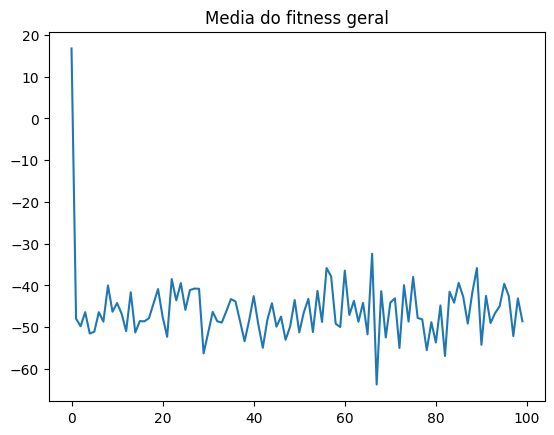

Text(0.5, 1.0, 'Melhor fitness')

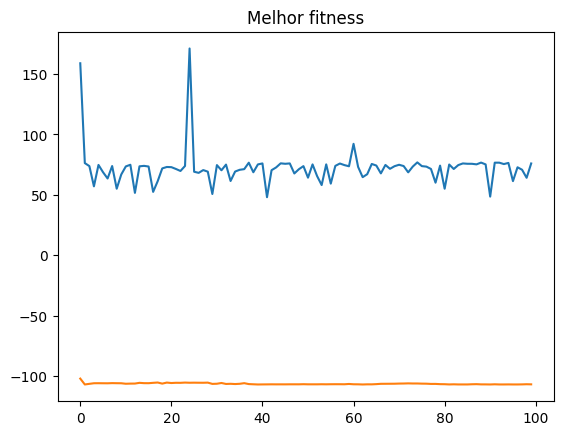

In [14]:
N = 100
Nsum = 5050

population = []
for i in range(N):
    population.append(generateIndividual())
    population[i].calculateFitness(fitnessFunction)

population = sortPopulation(population)

for i in range(N):
    population[i].calculateMapFitness(linearMappingFunction, i + 1, N)

children = []
for i in range(N):
	children.append(0)

n = 0

fitness_sum_med = []
fitness_sum_min = []
fitness_sum_max = []
while (n < 1000):
	pairs = []
	for i in range(0, N):
		odd = round(np.random.rand() * Nsum)
		sum = 0
		for j in range(1, N):
			sum += j
			if (sum >= odd): break
		aux = None
		for individual in population:
			if (individual.mappedFitness == j):
				aux = individual
				pairs.append(individual)				
				break
		if aux == None:
			pairs.append(population[0])

	for i in range(0, N, 2):
		if np.random.rand() < 0.7:
			children[i] = crossover(pairs[i], pairs[i + 1])
			children[i + 1] = crossover(pairs[i], pairs[i + 1])
		else:
			children[i] = Individual(pairs[i].x, pairs[i].y)
			children[i + 1] = Individual(pairs[i + 1].x, pairs[i + 1].y)
		
		children[i].calculateFitness(fitnessFunction)
		children[i + 1].calculateFitness(fitnessFunction)

		children[i].tryToMutate()
		children[i + 1].tryToMutate()

	children = sortPopulation(children)

	for i in range(N):
		children[i].calculateMapFitness(linearMappingFunction, i + 1, N)

	population = children
	if n % 10 == 0 or n == 0:
		# print("Best individual for generation " + str(n) + ": " + str(population[0].__str__()))
		f_sum = 0
		for i in population:
			f_sum += i.fitness
		fitness_sum_med.append(f_sum / N)
		fitness_sum_min.append(population[len(population)-1].fitness)
		fitness_sum_max.append(population[0].fitness)
	n += 1

print("Best individual: " + str(population[0].__str__()))

# plt.plot(fitness_sum_med)
# plt.title('Media do fitness geral')
# plt.show()
# plt.plot(fitness_sum_min)
# plt.title('Pior fitness')
# plt.show()
# plt.plot(fitness_sum_max)
# plt.title('Melhor fitness')
# plt.show()

plt.plot(fitness_sum_med, label='Media do fitness geral')
plt.plot(fitness_sum_min, label='Pior fitness')
plt.plot(fitness_sum_max, label='Melhor fitness')
plt.title('Fitness')
plt.legend()
plt.show()
